In [82]:
import pandas as pd
import matplotlib.pyplot as plt
from math import ceil

In [119]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 300)

# Read in Data

In [91]:
fldr = 'gmic_dual_bound_comparison_05_26_22'

In [92]:
dbr_meta = pd.read_csv(f'{fldr}/cglp_progress_tracker_meta.csv')
dbr = pd.read_csv(f'{fldr}/cglp_progress_tracker.csv')
dbr_iter = pd.read_csv(f'{fldr}/cglp_progress_tracker_iter.csv')

# Check Parameter Distributions

In [95]:
dbr_meta

,test number,variables,constraints,density,average objective coefficient,average constraint bound,tightness,gomory_cuts
0,0,16,16,0.824219,45.4375,75.62500,1.998106,True
1,1,16,16,0.187500,45.4375,136.43750,5.490566,True
2,2,16,32,0.181641,5.3125,187.21875,1.750970,True
3,3,32,32,0.803711,5.6875,109.31250,8.037109,True
4,5,16,16,0.828125,5.3125,72.18750,2.070312,True
5,6,16,32,0.177734,45.4375,120.68750,5.996603,True
6,7,32,32,0.801758,48.6250,978.53125,7.048420,True
7,8,16,32,0.832031,5.3125,48.21875,7.830882,True
8,9,32,32,0.196289,48.6250,368.68750,1.937208,True
9,10,32,16,0.183594,48.6250,233.56250,5.875000,True


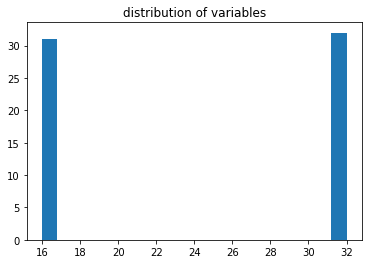

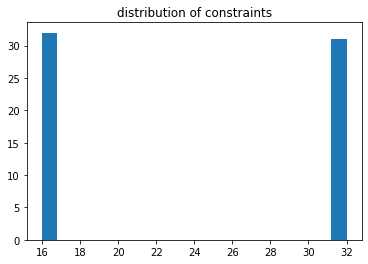

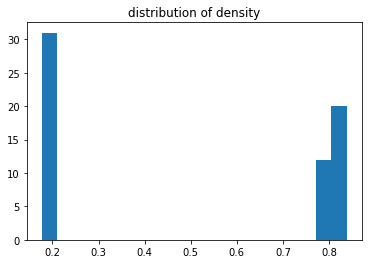

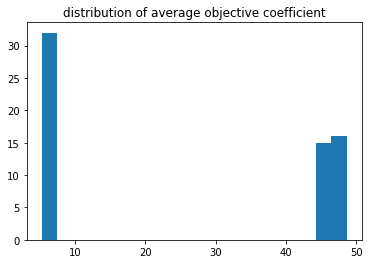

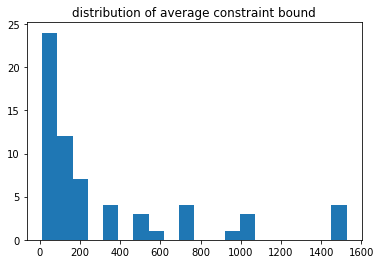

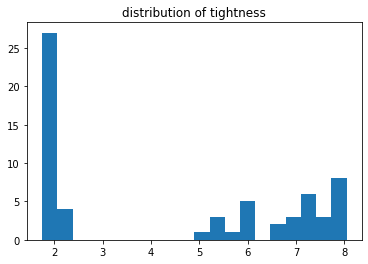

In [96]:
splits = {'variables': 24, 'constraints': 24, 'density': .5,
          'average objective coefficient': 25, 'average constraint bound': 100,
          'tightness': 4}
for v in splits:
    plt.hist(dbr_meta[v], bins=20)
    plt.title(f'distribution of {v}')
    plt.show()

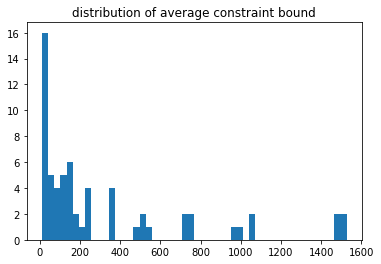

In [97]:
plt.hist(dbr_meta['average constraint bound'], bins=50)
plt.title(f'distribution of average constraint bound')
plt.show()

# Remove CLP/Parameter Induced Failures from Dual Bound Recovery Run Data

In [98]:
dbr

,test number,disjunctive terms,branching dual bound,cglp dual bound,cglp iterations,cut generation iterations,cut generation terminator
0,0,1,-1177.035715,-1177.034516,9,9,dual bound
1,0,2,-1177.029141,-1176.989518,16,17,dual bound
2,0,3,-1177.029141,-1176.917958,8,8,dual bound
3,0,4,-1176.993218,-1176.797163,13,13,dual bound
4,0,5,-1174.823357,-1173.763529,9,9,dual bound
...,...,...,...,...,...,...,...
1730,63,28,-1623.805031,-1626.266597,49,49,time
1731,63,29,-1623.805031,-1626.266597,49,49,time
1732,63,30,-1621.147827,-1637.188832,48,48,time
1733,63,31,-1621.147827,-1627.405592,49,49,time


In [100]:
s = dbr.groupby('test number')['disjunctive terms'].count()
s[s < 32]

test number
3     19
6      2
21     1
23    12
24    21
26    10
29    11
30    30
37     1
40     1
41    14
47     1
49    12
Name: disjunctive terms, dtype: int64

In [126]:
dbr[dbr['cglp iterations'] == 0]

,test number,disjunctive terms,branching dual bound,cglp dual bound,cglp iterations,cut generation iterations,cut generation terminator,ratio
73,2,10,-119.294324,-118.660545,0,75,dual bound,0.994687
88,2,25,-116.060713,-120.574490,0,165,cuts not deep enough,1.038892
89,2,26,-116.060713,-120.574490,0,165,cuts not deep enough,1.038892
91,2,28,-116.060713,-120.574490,0,165,cuts not deep enough,1.038892
92,2,29,-116.060713,-120.574490,0,165,cuts not deep enough,1.038892
93,2,30,-116.060713,-120.574490,0,165,cuts not deep enough,1.038892
94,2,31,-116.047030,-120.574490,0,165,cuts not deep enough,1.039014
95,2,32,-116.038845,-120.574490,0,165,cuts not deep enough,1.039087
360,13,20,-2094.924369,-2117.345172,0,86,time,1.010702
361,13,21,-2094.924369,-2117.345172,0,86,time,1.010702


In [120]:
dbr['ratio'] = dbr['cglp dual bound']/dbr['branching dual bound']
dbr.loc[1.001 < dbr['ratio']]

,test number,disjunctive terms,branching dual bound,cglp dual bound,cglp iterations,cut generation iterations,cut generation terminator,ratio
88,2,25,-116.060713,-120.574490,0,165,cuts not deep enough,1.038892
89,2,26,-116.060713,-120.574490,0,165,cuts not deep enough,1.038892
90,2,27,-116.060713,-120.574490,1,165,cuts not deep enough,1.038892
91,2,28,-116.060713,-120.574490,0,165,cuts not deep enough,1.038892
92,2,29,-116.060713,-120.574490,0,165,cuts not deep enough,1.038892
93,2,30,-116.060713,-120.574490,0,165,cuts not deep enough,1.038892
94,2,31,-116.047030,-120.574490,0,165,cuts not deep enough,1.039014
95,2,32,-116.038845,-120.574490,0,165,cuts not deep enough,1.039087
146,5,32,-108.453059,-108.589108,37,37,cuts not deep enough,1.001254
238,9,26,-2980.617006,-2983.599593,78,78,time,1.001001


In [7]:
# should be >= 1 -- CLP appears to send back wrong solutions when < .999
# We just didn't get all the way to recovered when >1.001
dbr['ratio'] = dbr['cglp dual bound']/dbr['branching dual bound']
dbr.loc[.999 > dbr['ratio']]

,test number,disjunctive terms,branching dual bound,cglp dual bound,cglp iterations,cut generation iterations,cut generation terminator,ratio
192,6,1,-1487.411727,inf,1,1,NaN,-inf
193,6,2,-1472.873691,inf,1,1,NaN,-inf
194,6,3,-1472.873691,inf,1,1,NaN,-inf
202,6,11,-1446.204933,-1442.027587,26,26,no sufficient cuts,0.997112
208,6,17,-1438.692009,-1436.988983,29,29,no improving cuts,0.998816
211,6,20,-1437.903406,-1419.518761,25,25,no improving cuts,0.987214
212,6,21,-1437.903406,-1419.518761,25,25,no improving cuts,0.987214
213,6,22,-1431.188976,-1414.816906,47,48,no improving cuts,0.988561
214,6,23,-1431.188976,-1414.816906,47,48,no improving cuts,0.988561
218,6,27,-1430.991591,-1424.529171,25,25,no sufficient cuts,0.995484


In [8]:
# filter down to just the tests that ran successfully/reasonably
dbr = dbr.loc[(.999 < dbr['ratio']) & (dbr['cglp iterations'] < 1000)]

In [88]:
dbr.loc[dbr['test number'] == 1]

,test number,disjunctive terms,branching dual bound,cglp dual bound,cglp iterations,cut generation iterations,cut generation terminator,ratio
32,1,1,-13668.506491,-13668.506491,2,2,no sufficient cuts,1.000000
33,1,2,-13666.760025,-13666.760025,6,6,no sufficient cuts,1.000000
34,1,3,-13665.355658,-13665.355658,8,8,no improving cuts,1.000000
35,1,4,-13662.805003,-13662.805003,12,12,no improving cuts,1.000000
36,1,5,-13662.805003,-13662.805003,12,12,no sufficient cuts,1.000000
37,1,6,-13662.805003,-13662.805003,11,11,no sufficient cuts,1.000000
38,1,7,-13662.805003,-13662.805003,8,8,no sufficient cuts,1.000000
39,1,8,-13661.965003,-13661.965003,16,16,no sufficient cuts,1.000000
40,1,9,-13661.965003,-13661.965003,16,16,no sufficient cuts,1.000000
41,1,10,-13659.805003,-13659.805003,17,17,no improving cuts,1.000000


# Limit Dual Bound Iteration Level Data to Only Clean Runs

In [10]:
dbr_iter = pd.merge(dbr_iter, dbr[['test number', 'disjunctive terms']],
                    on=['test number', 'disjunctive terms'])
dbr_iter

,test number,disjunctive terms,cut generation iteration,dual bound
0,0,1,0,-1188.365844
1,0,1,1,-1188.289807
2,0,1,2,-1188.289807
3,0,2,0,-1188.365844
4,0,2,1,-1188.289807
...,...,...,...,...
74646,63,32,102,-1657.114873
74647,63,32,103,-1657.109976
74648,63,32,104,-1657.082894
74649,63,32,105,-1657.030479


# Show Iterations to Recover Dual Bound

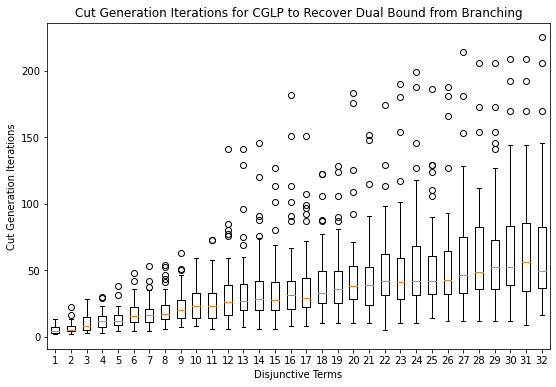

In [97]:
gb = dict(tuple(dbr.groupby("disjunctive terms")["cglp iterations"]))
plt.boxplot(gb.values())
# plt.yscale('log')
plt.xlabel('Disjunctive Terms')
plt.ylabel('Cut Generation Iterations')
plt.title('Cut Generation Iterations for CGLP to Recover Dual Bound from Branching')
plt.gcf().set_size_inches(9, 6)
plt.show()

/var/folders/qh/8w1ddh_n45l3750bgmcgmd4r0000gn/T/ipykernel_9964/1213469609.py:22: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/var/folders/qh/8w1ddh_n45l3750bgmcgmd4r0000gn/T/ipykernel_9964/1213469609.py:22: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/var/folders/qh/8w1ddh_n45l3750bgmcgmd4r0000gn/T/ipykernel_9964/1213469609.py:22: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/var/folders/qh/8w1ddh_n45l3750bgmcgmd4r0000gn/T/ipykernel_9964/1213469609.py:22: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/var/folders/qh/8w1ddh_n45l3750bgmcgmd4r0000gn/T/ipykern

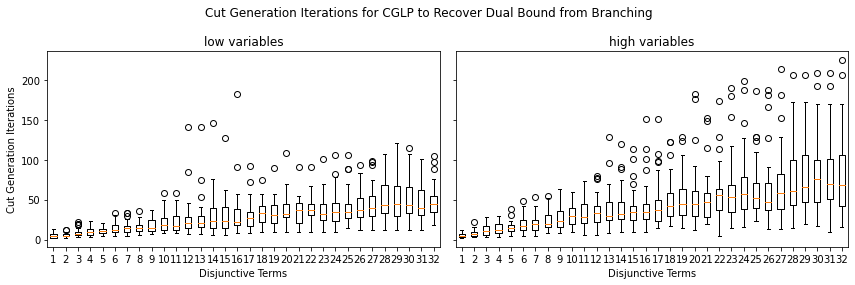

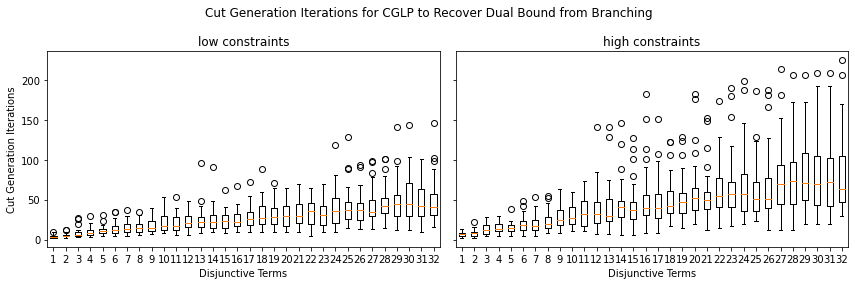

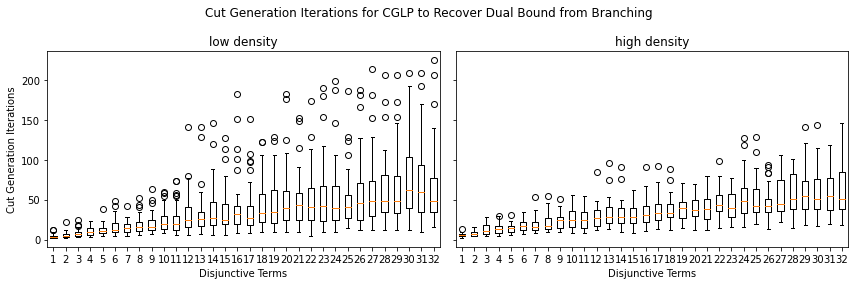

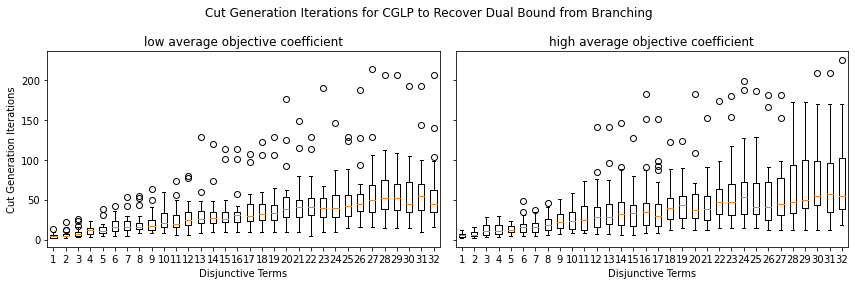

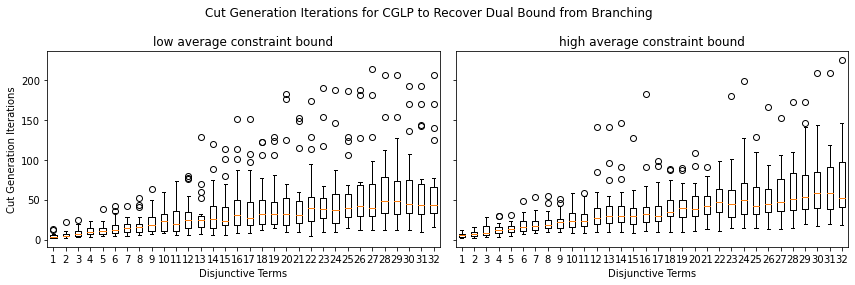

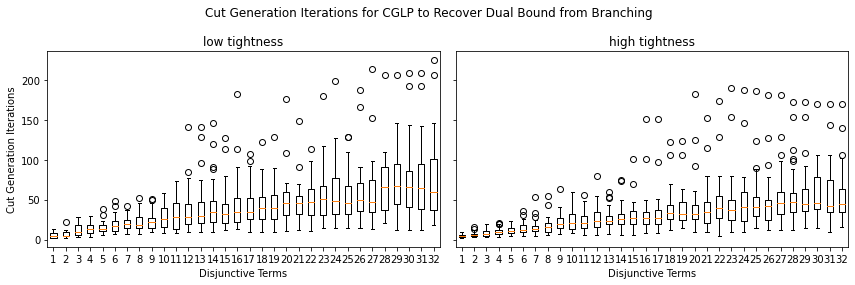

In [34]:
for v, s in splits.items():
    # split data sets by high and low for a variable then break out by disjunctive terms
    df_low = pd.merge(dbr_meta.loc[dbr_meta[v] < s]['test number'], dbr, on='test number')
    df_high = pd.merge(dbr_meta.loc[dbr_meta[v] >= s]['test number'], dbr, on='test number')
    gb_low = dict(tuple(df_low.groupby("disjunctive terms")["cglp iterations"]))
    gb_high = dict(tuple(df_high.groupby("disjunctive terms")["cglp iterations"]))
    
    # make graphs
    fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(12, 4))
    ax[0].boxplot(gb_low.values())
    ax[0].set_title(f"low {v}")
    ax[1].boxplot(gb_high.values())
    ax[1].set_title(f"high {v}")
    
    # make them pretty
    fig.suptitle('Cut Generation Iterations for CGLP to Recover Dual Bound from Branching')
    ax[0].set_ylabel('Cut Generation Iterations')
    ax[0].set_xlabel('Disjunctive Terms')
    ax[1].set_xlabel('Disjunctive Terms')
    fig.tight_layout()

    fig.show()

# Plot Improvements Due to Each Cut Generation Iteration

In [66]:
# make a new df of dbr_iter with relative improvements of each cut generation iteration
wdi = dbr_iter
vals = wdi['dual bound'].tolist()
wdi['prev dual bound'] = vals[-1:] + vals[:-1]
wdi['relative bound improvement'] = (wdi['prev dual bound'] - wdi['dual bound'])/wdi['prev dual bound']

# drop first and last iterations
def f(df):
    return df.loc[(df['cut generation iteration'] != df['cut generation iteration'].max()) &
                  (df['cut generation iteration'] != 0)]

group_cols = ["test number", "disjunctive terms"]
data_cols = ['cut generation iteration', 'relative bound improvement']
wdi = wdi.groupby(group_cols)[data_cols].apply(f).reset_index(level=-1, drop=True).reset_index()
wdi

,test number,disjunctive terms,cut generation iteration,relative bound improvement
0,0,1,1,6.398432e-05
1,0,2,1,6.398432e-05
2,0,2,2,5.618027e-04
3,0,2,3,2.271178e-04
4,0,3,1,6.398432e-05
...,...,...,...,...
70738,63,32,101,2.604142e-05
70739,63,32,102,1.868019e-07
70740,63,32,103,2.954799e-06
70741,63,32,104,1.634341e-05


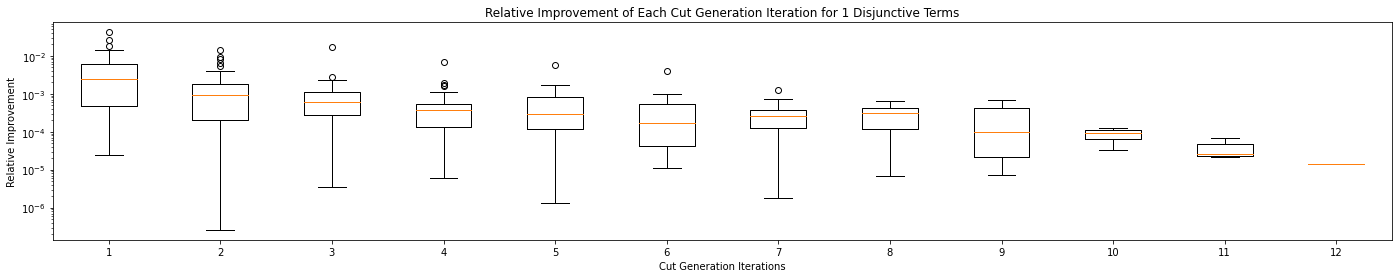

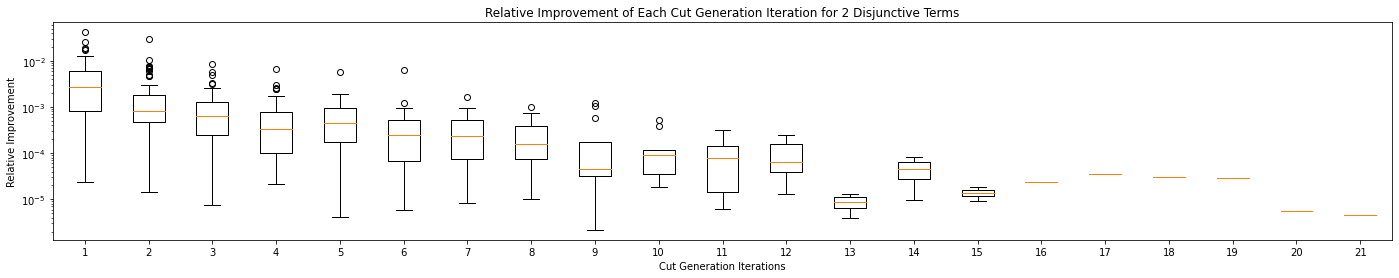

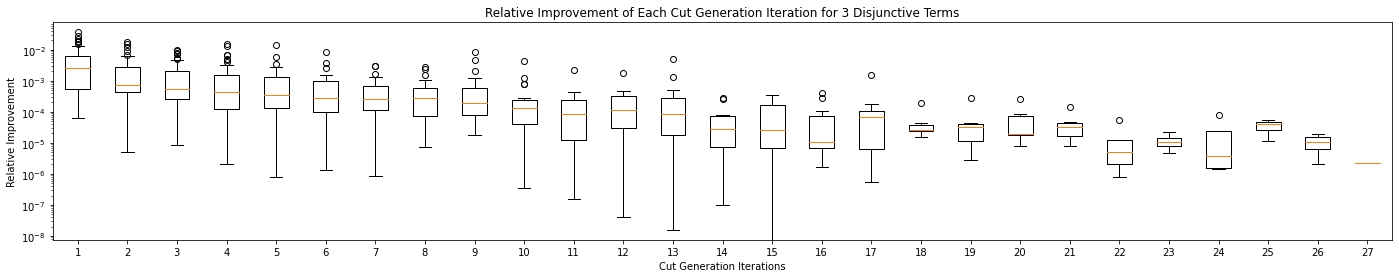

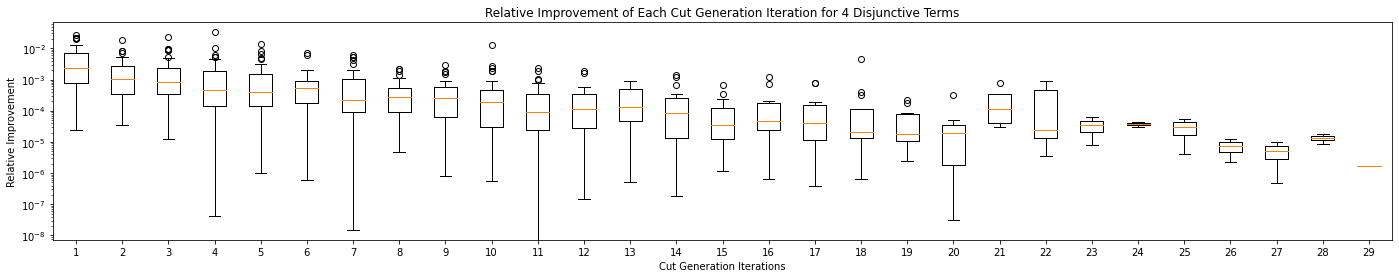

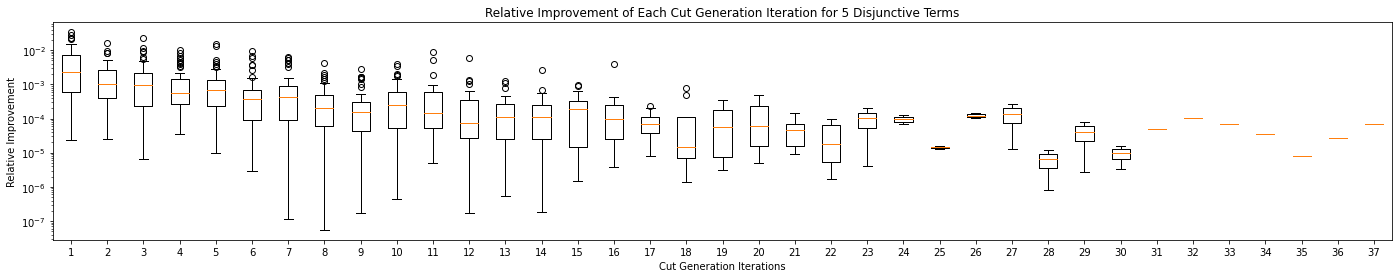

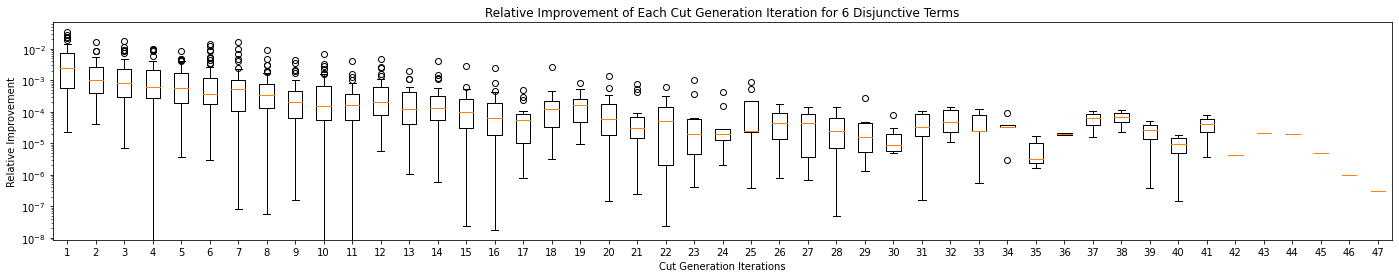

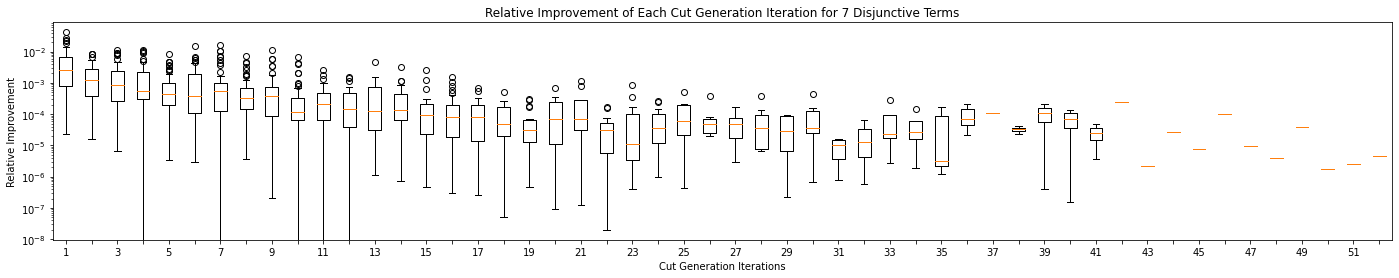

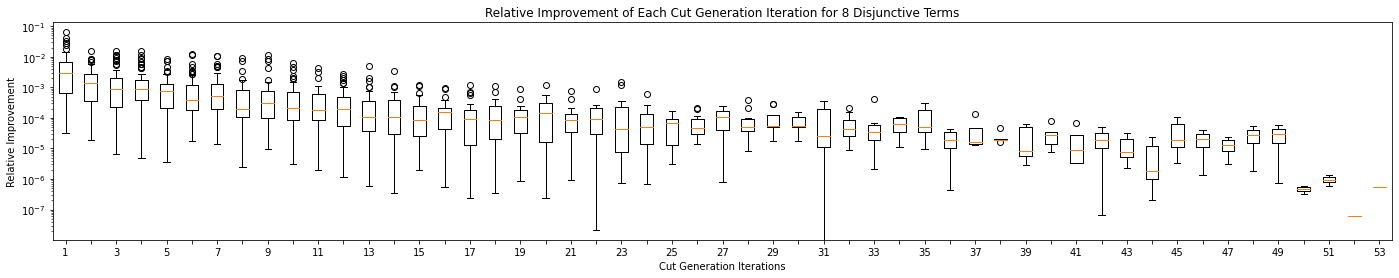

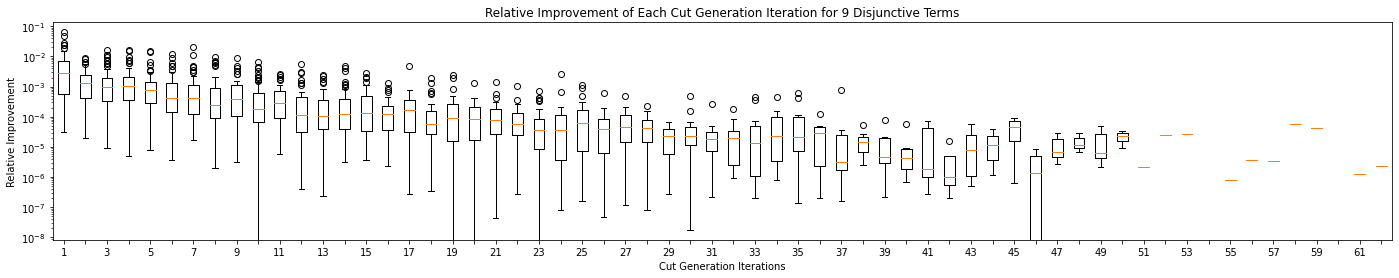

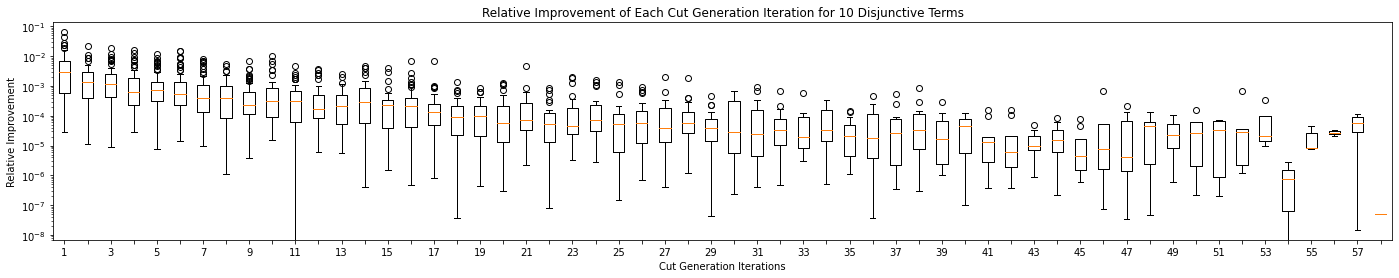

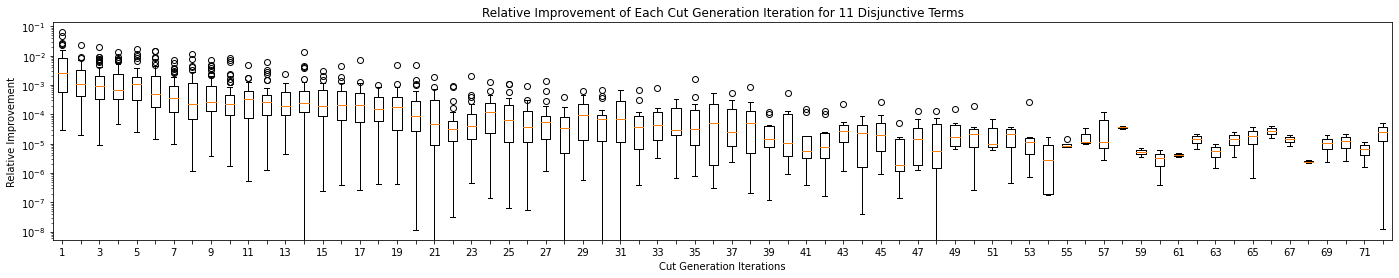

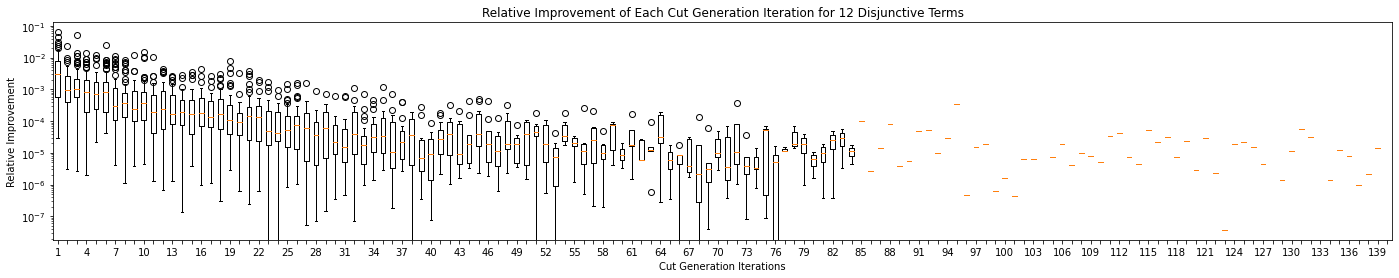

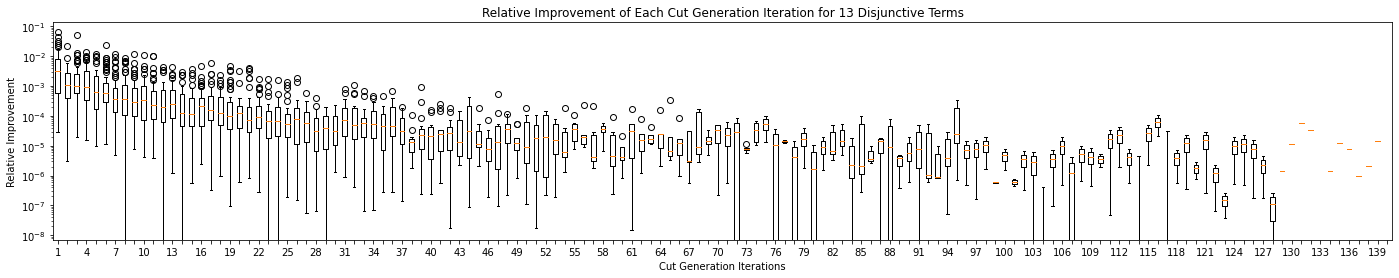

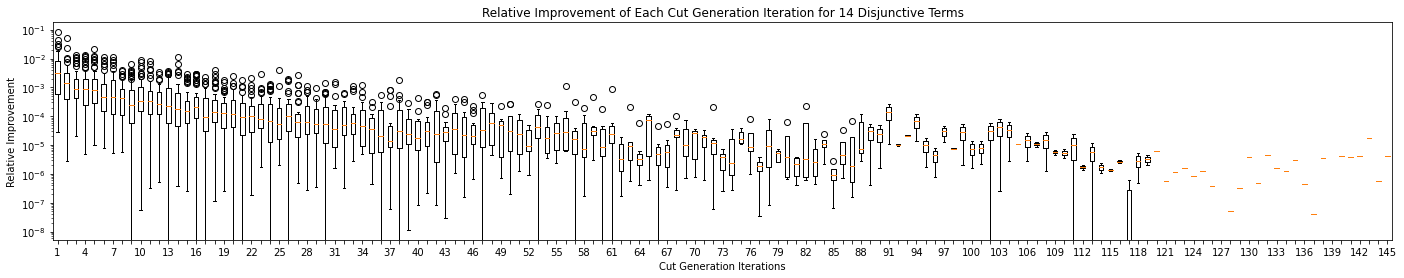

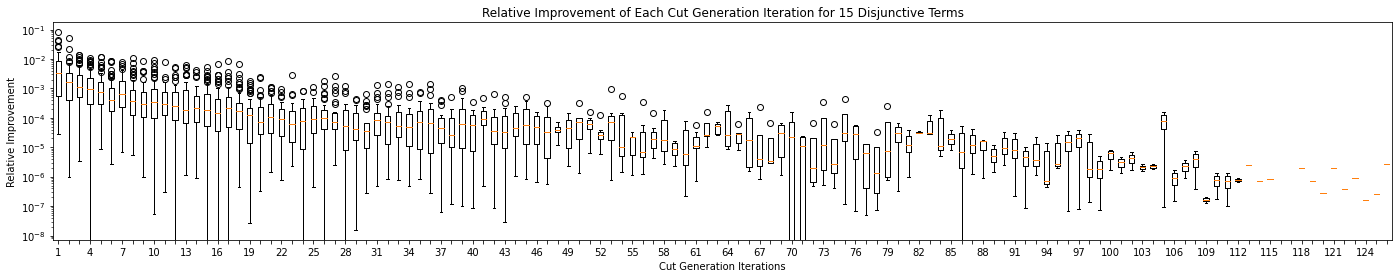

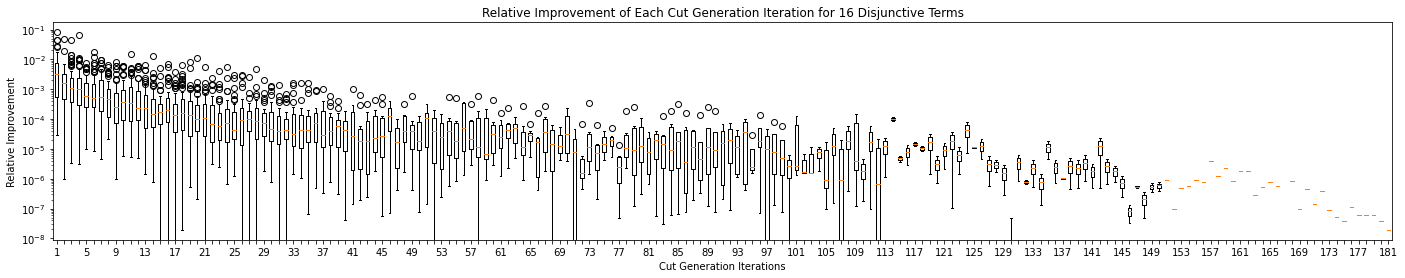

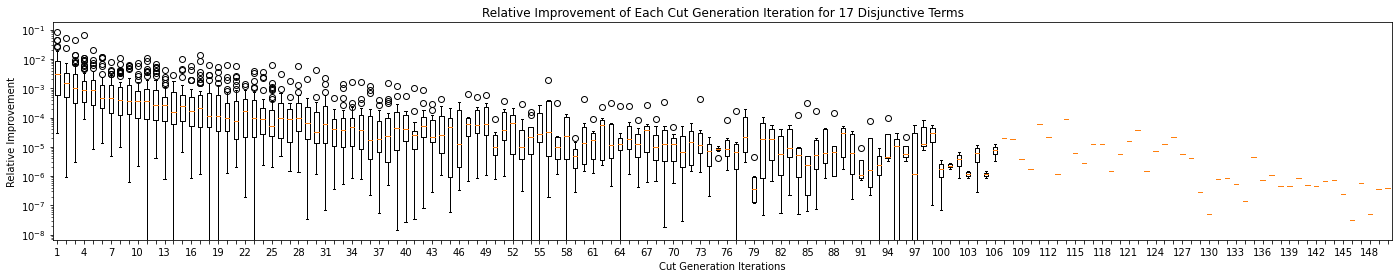

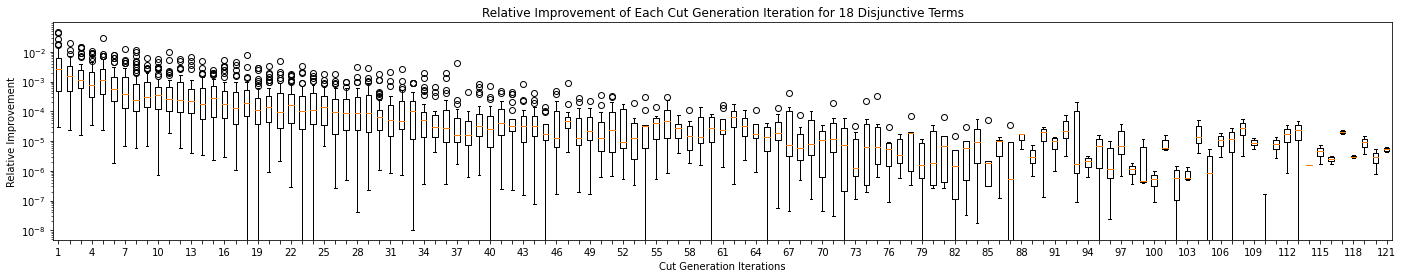

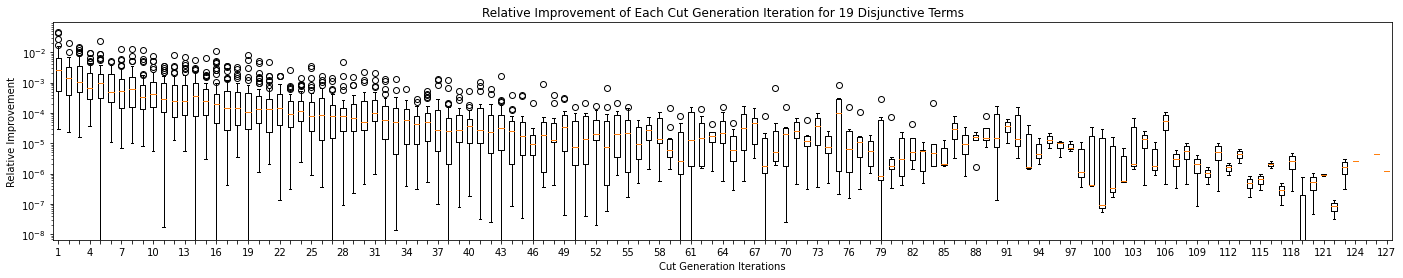

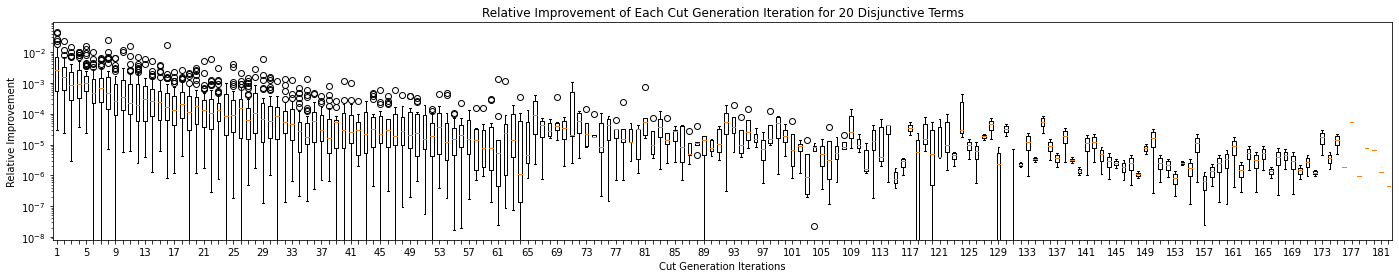

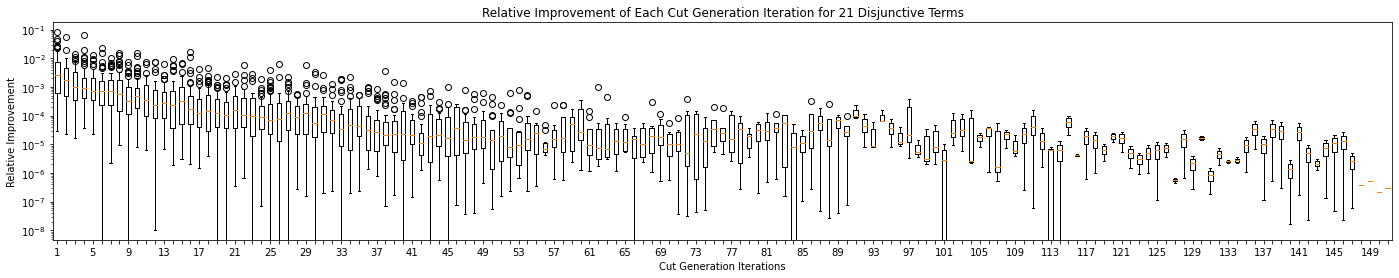

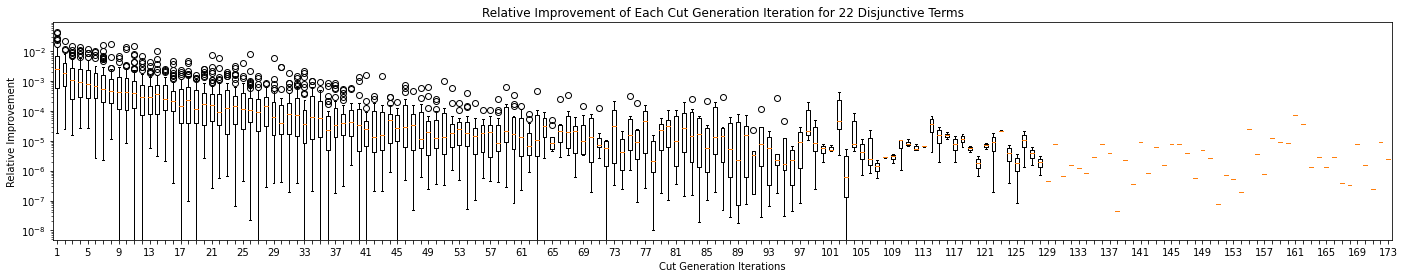

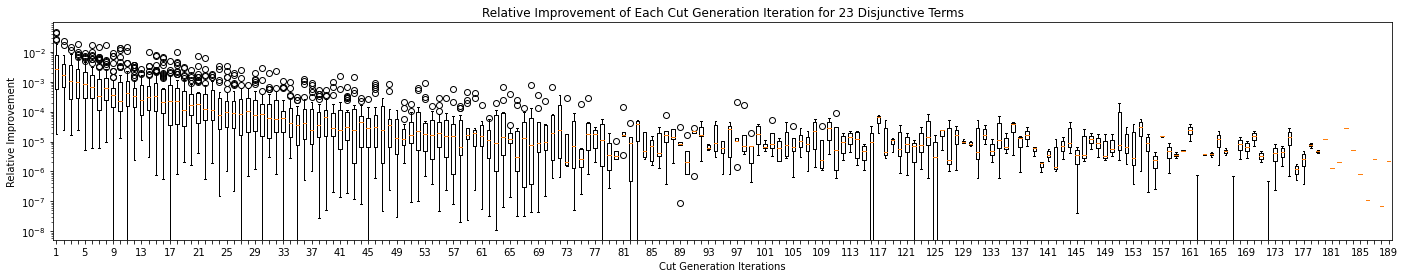

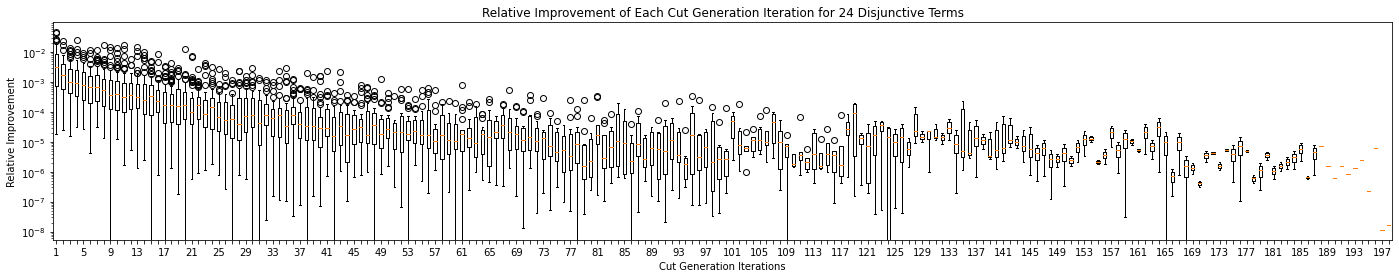

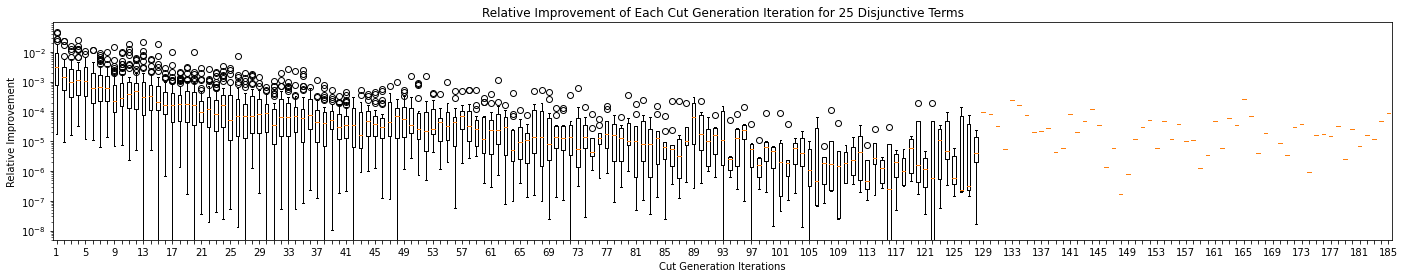

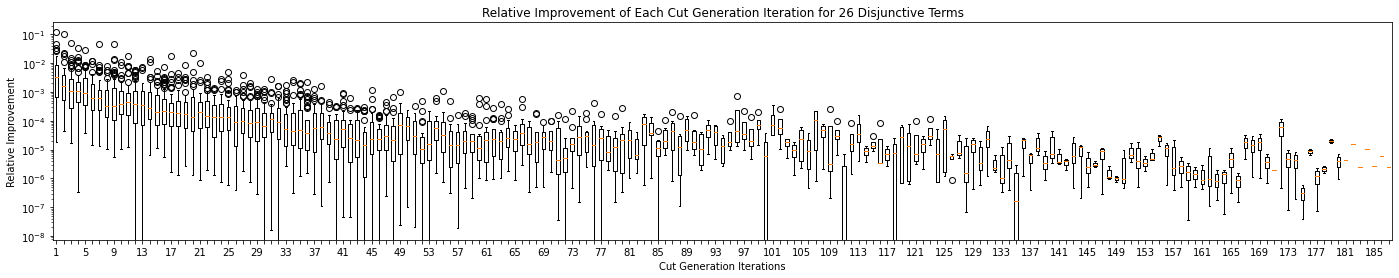

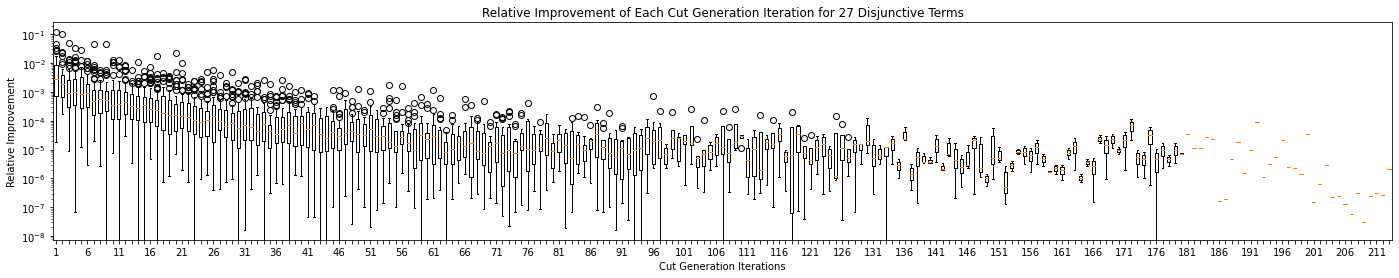

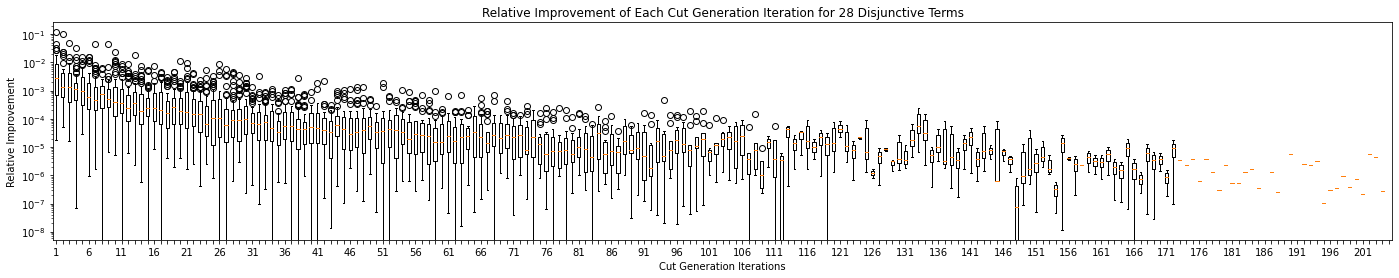

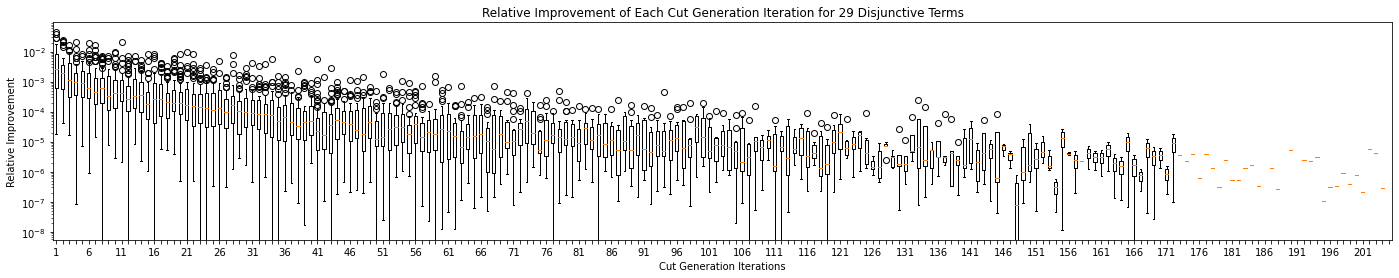

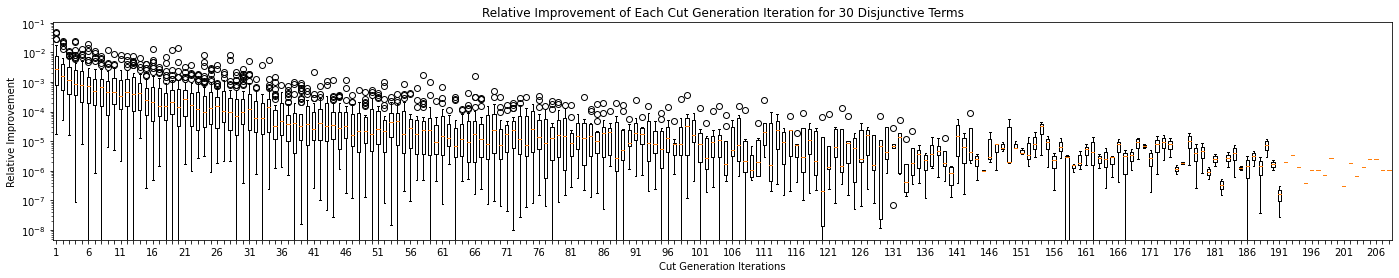

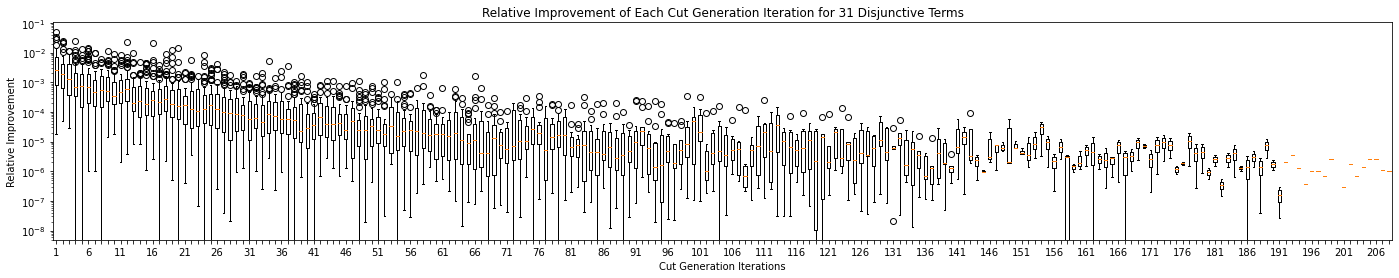

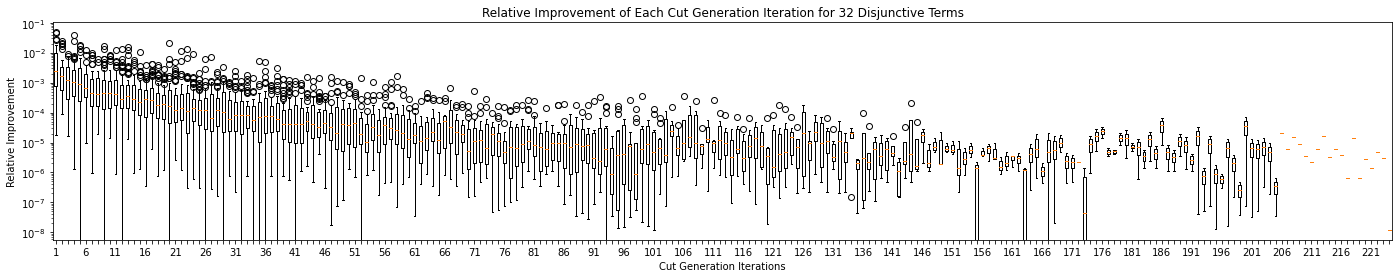

In [85]:
# for each disjunctive term, what is the distribution of progress made by each cut
for dt, df in wdi.groupby("disjunctive terms"):
    fig, ax = plt.subplots()
    gb = dict(tuple(df.groupby("cut generation iteration")['relative bound improvement']))
    plt.boxplot(gb.values())
    plt.yscale('log')
    plt.xlabel('Cut Generation Iterations')
    plt.ylabel('Relative Improvement')
    plt.title(f'Relative Improvement of Each Cut Generation Iteration for {dt} Disjunctive Terms')
    plt.gcf().set_size_inches(24, 4)
    for n, label in enumerate(ax.xaxis.get_ticklabels()):
        if n % ceil(len(gb.keys())/50) != 0:
            label.set_visible(False)
    plt.show()

In [89]:
dbr_iter.loc[(dbr_iter['test number'] == 2) & (dbr_iter['disjunctive terms'] == 1)]

,test number,disjunctive terms,cut generation iteration,dual bound,prev dual bound,relative bound improvement
1430,2,1,0,-136.210052,-13655.566816,0.990025
1431,2,1,1,-135.185393,-136.210052,0.007523
1432,2,1,2,-134.937327,-135.185393,0.001835
1433,2,1,3,-134.927327,-134.937327,0.000074
1434,2,1,4,-134.859819,-134.927327,0.000500
1435,2,1,5,-134.859819,-134.859819,-0.000000


In [90]:
dbr.loc[dbr['test number'] == 2]

,test number,disjunctive terms,branching dual bound,cglp dual bound,cglp iterations,cut generation iterations,cut generation terminator,ratio
64,2,1,-134.859819,-134.859819,5,5,no improving cuts,1.000000
65,2,2,-133.886106,-133.886106,12,12,no sufficient cuts,1.000000
66,2,3,-133.886106,-133.886106,10,10,no improving cuts,1.000000
67,2,4,-132.659295,-132.608491,15,15,no improving cuts,0.999617
68,2,5,-132.659295,-132.608491,15,15,no sufficient cuts,0.999617
69,2,6,-132.659295,-132.659295,23,23,no sufficient cuts,1.000000
70,2,7,-132.659295,-132.659295,17,17,no sufficient cuts,1.000000
71,2,8,-132.550177,-132.550176,14,14,cuts not deep enough,1.000000
72,2,9,-132.550177,-132.550177,22,22,cuts not deep enough,1.000000
73,2,10,-132.550177,-132.550177,18,18,no improving cuts,1.000000
